# Minimum predictive error experiment

In [36]:
import math
import matplotlib
import matplotlib.pyplot as plt
import testutilities
import time
import second_moment_experiments_main as experiment
import numpy as np
from scipy.special import comb
from baselines import Regression
from data_generators import ContinuousGenerator
from itertools import chain
from netmechanism import FeaturesLattice, TargetsLattice

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

$\textbf{Setup:}$ Plot minimum and maximum of the predictive error of a range of outcomes as a function of the lattice density. Sample $250$ samples with the netmechanism for each lattice density and plot the minimum predictive error of the samples against the min/max predictive error corresponding to the datasets with optimal utility

## Experiment set-up

In [37]:
# General parameters
batch_size = 3000
n_private = 40 # 20 for test, 20 to train since test_frac is set to 0.5
test_frac = 0.5
dim = 2 

In [38]:
# Generate the private data
private_data = ContinuousGenerator(d = dim, n = n_private)
private_data.generate_data(test_frac = test_frac)
print ("Coefficients of the model from which the private data was generated are", private_data.coefs)
# Calculate its 'contribution' to the utility
F_tilde_x = testutilities.get_private_F_tilde(private_data)

Coefficients of the model from which the private data was generated are [[0.03459577]
 [0.89392521]]


In [39]:
# Experiment specific
# Mesh quality parameters
num_points_min = 3
num_points_max = 20
epsilon = 5.0

In [40]:
# Derived parameters
# Calculate the constant that multiplies the utility to get the score
scaled_epsilon = epsilon/2 
# Inverse global sensitivity
igs = private_data.features.shape[0]/2 
# Utility scaling constant 
scaling_const = igs*scaled_epsilon

In [41]:
# Set other parameters necessary for the code to work
experiment_name = 'test_struct_integrity'
directory = 'C:/Users/alexc/OneDrive/Documents/GitHub/Thesis/Experiments/' + experiment_name + '/OutcomeSpace'
base_filename_s = "s_eps" + str(epsilon).replace(".", "") + "d" + str(dim)

In [42]:
# Additional parameters for sampling algorithm
parallel = False
save_data = False
partition_method = 'fast_2'
workers = -1
num_samples = 250
sample_parallel = False 
load_data = False
seed = 23

## Obtain the minimum and maximum of the predictive error for the optimal outcomes for each lattice density 

In [43]:
# Generate the synthetic features and targets
opt_pred_err_netmech_min = []
opt_pred_err_netmech_max = []
for num_points_feat, num_points_targ in zip(range(num_points_min, num_points_max + 1), range(num_points_min, num_points_max + 1)):
    results = []
    OutputLattice = FeaturesLattice()
    OutputLattice2 = TargetsLattice()
    OutputLattice.generate_l2_lattice(dim = dim, num_points = num_points_feat)
    OutputLattice2.generate_lattice(dim = dim, num_points = num_points_targ)
    targets = OutputLattice2.points
    features = OutputLattice.points
    n_batches = math.ceil(comb(features.shape[0], dim, exact = False)/batch_size)
    print ("Number of batches is", n_batches)
    for batch_index in range(n_batches):
        results.append(testutilities.evaluate_sample_score(batch_index, features, targets, scaling_const, F_tilde_x, dim, \
                                                           batch_size, base_filename_s, directory))
    optimal_synthetic_datasets = np.array(testutilities.get_optimal_datasets(results, features, targets, batch_size, dim))
    optimal_netmech_regressor = Regression()
    optimal_param = optimal_netmech_regressor.fit_data(optimal_synthetic_datasets)
    optimal_predictive_err_netmech = optimal_netmech_regressor.calculate_predictive_error(private_data.test_data, optimal_param)
    opt_pred_err_netmech_min.append(np.min(optimal_predictive_err_netmech))
    opt_pred_err_netmech_max.append(np.max(optimal_predictive_err_netmech))

Number of batches is 1
Warning, there were singular sythethic matrices
Number of batches is 1
Number of batches is 1
Number of batches is 1
Warning, there were singular sythethic matrices
Number of batches is 1
Number of batches is 1
Number of batches is 1
Number of batches is 1
Number of batches is 2


C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


Number of batches is 2
Number of batches is 3
Number of batches is 3
Number of batches is 4
Number of batches is 5
Number of batches is 7
Number of batches is 8
Number of batches is 11
Number of batches is 13


## Sample $250$ samples with the netmechanism for each lattice density and record the minimum predictive error

In [44]:
# Run the experiment
results = []
for num_points_features, num_points_targets in zip(range(num_points_min, num_points_max + 1), range(num_points_min, num_points_max + 1)):
    results.append(experiment.second_order_moment_experiment(dimensionality = dim, num_records = n_private, test_frac = test_frac,\
                                                             batch_size = batch_size,directory = directory, parallel = parallel, \
                                                             save_data = save_data,partition_method = partition_method, \
                                                             workers = workers, num_samples = num_samples,sample_parallel = sample_parallel, \
                                                             load_data = load_data, num_points_targets = num_points_targets,\
                                                             num_points_features = num_points_features, epsilon = epsilon, seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 0.0006460257298256458
Max scaled utility is -9.99564993218839
Generation time 0.001994609832763672
Sampling time 0.009974002838134766
Overall max utility -0.39982599728753565
Elapsed time without parallelisation is 0.017951011657714844
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 2.0678306293591144
Max scaled utility is -0.6837877788753703
Generation time 0.001994609832763672
Sampling time 0.007979869842529297
Overall max utility -0.027351511155014815
Elapsed time without parallelisation is 0.01495981216430664
Initialising synthetic feature space lattice
Synthetic feature space initiali

In [45]:
# Extract synthetic data from the results
synthetic_datasets_vec = []
for result in results:
    synthetic_datasets_vec.append(result['synthetic_data'])

In [46]:
# Regress on the private data for each parameter setting and calculate RMSE statistics
net_mech_reg_coefs = []
predictive_errs_netmech = []
min_predictive_errs_netmech = []
mean_predictive_errs_netmech = []
double_std_predictive_errs_netmech = []
for synthetic_datasets in synthetic_datasets_vec:
    netmech_regressor = Regression()
    net_mech_reg_coef = netmech_regressor.fit_data(synthetic_datasets)
    net_mech_reg_coefs.append(net_mech_reg_coef)
    predictive_err_netmech = netmech_regressor.calculate_predictive_error(private_data.test_data, net_mech_reg_coef)
    predictive_errs_netmech.append(predictive_err_netmech)
    min_predictive_errs_netmech.append(np.min(predictive_err_netmech))
    mean_predictive_errs_netmech.append(np.mean(predictive_err_netmech))
    double_std_predictive_errs_netmech.append(2*np.std(predictive_err_netmech))

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices


C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]


## Plots

In [47]:
xcoordinate = list(range(num_points_min, num_points_max + 1))
def plot_sample_opt_rmse(xcoordinate, opt_pred_err_netmech_min, opt_pred_err_netmech_max, min_predictive_errs_netmech):
    plt.plot(xcoordinate, opt_pred_err_netmech_min, label = r'$\min$')
    plt.plot(xcoordinate, opt_pred_err_netmech_max, '--', label = r'$\max$')
    plt.plot(xcoordinate, min_predictive_errs_netmech,'--', label = r'$\min$ sampled')
    plt.xticks(xcoordinate)
    plt.xlabel('Lattice density', fontsize = 20)
    plt.ylabel('RMSE', fontsize = 20)
    plt.grid(True)
    plt.legend (fontsize = 14)
    plt.show()

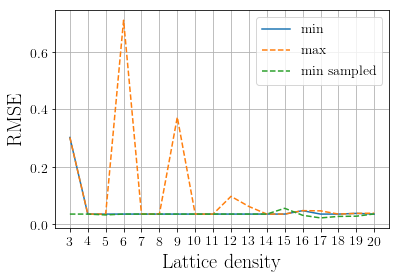

Epsilon 0.1


In [22]:
#%matplotlib tk
plot_sample_opt_rmse(xcoordinate, opt_pred_err_netmech_min, opt_pred_err_netmech_max, min_predictive_errs_netmech)
print("Epsilon", epsilon)

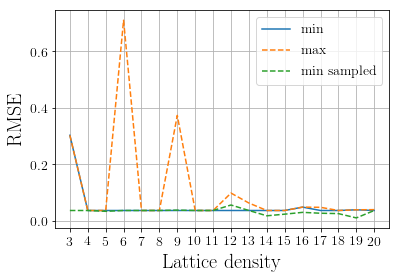

Epsilon 0.2


In [35]:
plot_sample_opt_rmse(xcoordinate, opt_pred_err_netmech_min, opt_pred_err_netmech_max, min_predictive_errs_netmech)
print("Epsilon", epsilon)

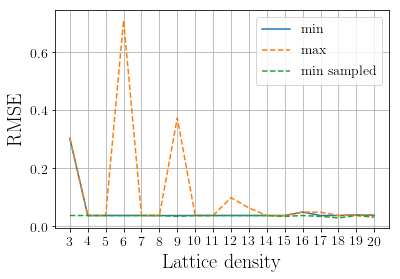

Epsilon 5.0


In [48]:
plot_sample_opt_rmse(xcoordinate, opt_pred_err_netmech_min, opt_pred_err_netmech_max, min_predictive_errs_netmech)
print("Epsilon", epsilon)

In [14]:
# Print the dataset that gives the overall min predictive error 
# NB: This is for epsilon = 0.2
optimal_dataset = synthetic_datasets_vec[np.argmin(min_predictive_errs_netmech)][np.argmin(predictive_errs_netmech[np.argmin(min_predictive_errs_netmech)])]
F_tilde_r = testutilities.get_synthetic_F_tilde(optimal_dataset, dim)
print("Utility is ", np.max(np.abs(F_tilde_x - F_tilde_r)))
coef = np.linalg.solve(optimal_dataset[:,:-1], optimal_dataset[:,-1:])
print ("Optimal coefficients", coef)

Utility is  0.09963140350411134
Optimal coefficients [[0.0625]
 [0.8125]]
